# Computer Vision NLP Project

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [2]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug

  Using cached smdebug-1.0.12-py2.py3-none-any.whl (270 kB)
  Using cached pyinstrument-3.4.2-py2.py3-none-any.whl (83 kB)
  Using cached pyinstrument_cext-0.2.4-cp37-cp37m-manylinux2010_x86_64.whl (20 kB)


In [3]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3
import os
from sagemaker.pytorch import PyTorch
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [ ]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip

#files are copied to the s3 using cli

--2023-04-08 12:21:36--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.120.64
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.120.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  21.0MB/s    in 54s     

2023-04-08 12:22:31 (19.9 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  
  inflating: dogImages/test/001.Af

In [6]:
#Number of classes in each dataset (Dog Breeds)
!find dogImages/train -mindepth 1 -maxdepth 1 -type d | wc -l

133


In [7]:
#Number of samples in train dataset
!find dogImages/train -type f|wc -l

6680


In [8]:
#Number of samples in test dataset
!find dogImages/test -type f|wc -l

836


In [9]:
#Number of samples in validation dataset
!find dogImages/valid -type f|wc -l

835


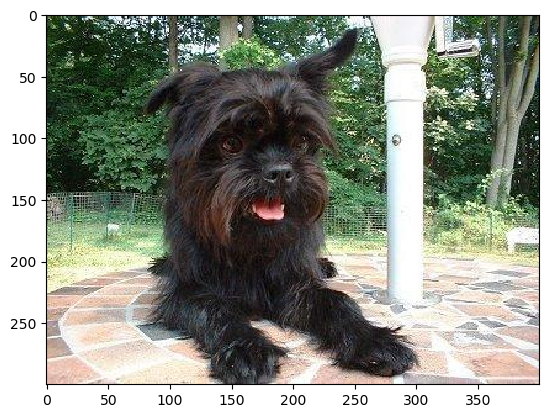

In [4]:
#here is a sample image from the train dataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg')

plt.imshow(img)
plt.show()


In [4]:
#global variables
role = sagemaker.get_execution_role()
session = boto3.session.Session()
region = session.region_name
bucket = "deep-learning-ml/project"
s3_output_location = "deep-learning-ml/models"
sagemaker_session = sagemaker.Session()

In [5]:
data_channels = {
    "train": f"s3://{bucket}/train/",
    "valid": f"s3://{bucket}/valid/",
    "test": f"s3://{bucket}/test/",
}

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [6]:
hyperparameter_ranges = {
    "lr": ContinuousParameter(0.001, 0.1),
    "batch_size": CategoricalParameter([32, 64, 128, 256]),
}

objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Testing Loss: ([0-9\\.]+)"}]

In [7]:
estimator = PyTorch(
    entry_point="hpo.py",
    role=role,
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.m5.xlarge"
)

tuner =  HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=4,
    max_parallel_jobs=2,
    objective_type=objective_type,
)

In [8]:
estimator.fit(
    data_channels, 
    wait=True)

INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: pytorch-training-2023-04-14-12-57-09-947


2023-04-14 12:57:11 Starting - Starting the training job...
2023-04-14 12:57:26 Starting - Preparing the instances for training...
2023-04-14 12:58:06 Downloading - Downloading input data......
2023-04-14 12:59:16 Training - Training image download completed. Training in progress...bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2023-04-14 12:59:26,852 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2023-04-14 12:59:26,855 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2023-04-14 12:59:26,864 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2023-04-14 12:59:26,866 sagemaker_pytorch_container.training INFO     Invoking user training script.
2023-04-14 12:59:27,031 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2023-04-14 12:59:27,045 sagemaker-training-toolkit INFO     No

In [9]:
tuner.fit(data_channels, wait=True)

INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating hyperparameter tuning job with name: pytorch-training-230414-1304


...........................................................................................................................................!


In [10]:
best_estimator = tuner.best_estimator() 

best_hp = best_estimator.hyperparameters()
print(best_hp)


2023-04-14 13:11:25 Starting - Preparing the instances for training
2023-04-14 13:11:25 Downloading - Downloading input data
2023-04-14 13:11:25 Training - Training image download completed. Training in progress.
2023-04-14 13:11:25 Uploading - Uploading generated training model
2023-04-14 13:11:25 Completed - Resource reused by training job: pytorch-training-230414-1304-004-852af412
{'_tuning_objective_metric': '"average test loss"', 'batch_size': '"256"', 'lr': '0.07890479774780734', 'sagemaker_container_log_level': '20', 'sagemaker_estimator_class_name': '"PyTorch"', 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"', 'sagemaker_job_name': '"pytorch-training-2023-04-14-13-04-44-656"', 'sagemaker_program': '"hpo.py"', 'sagemaker_region': '"us-east-1"', 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-254792028129/pytorch-training-2023-04-14-13-04-44-656/source/sourcedir.tar.gz"'}


## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [20]:
# TODO: Set up debugging and profiling rules and hooks
from sagemaker.debugger import (
    Rule,
    DebuggerHookConfig,
    rule_configs,
)
from sagemaker.debugger import Rule, ProfilerRule, rule_configs, ProfilerConfig, FrameworkProfile, CollectionConfig

rules = [
    ProfilerRule.sagemaker(rule_configs.LowGPUUtilization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
]

profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=5)
)
collection_config = [CollectionConfig(
    name="CrossEntropyLoss_output_0", 
    parameters={
        "include_regex": "CrossEntropyLoss_output_0",
        "train.save_interval": "5", 
        "eval.save_interval": "1"})]
    
debugger_config = DebuggerHookConfig(
    collection_configs=collection_config
)

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [38]:
hyperparameters = {"batch_size": "256", "lr": "0.07890479774780734"} 

estimator = PyTorch(
    role=sagemaker.get_execution_role(),
    instance_count=1,
    instance_type="ml.m5.2xlarge",
    entry_point="train_model.py",
    framework_version="1.4.0",
    py_version="py3",
    hyperparameters=hyperparameters,
    profiler_config=profiler_config, 
    debugger_hook_config=debugger_config, 
    rules=rules
)

estimator.fit(data_channels, wait=True)

INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: pytorch-training-2023-04-14-15-17-11-429


2023-04-14 15:17:14 Starting - Starting the training job...
2023-04-14 15:17:40 Starting - Preparing the instances for trainingVanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
LowGPUUtilization: InProgress
ProfilerReport: InProgress
...
2023-04-14 15:18:20 Downloading - Downloading input data......
2023-04-14 15:19:21 Training - Training image download completed. Training in progress...bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2023-04-14 15:19:31,944 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2023-04-14 15:19:31,947 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
2023-04-14 15:19:31,958 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2023-04-14 15:19:31,960 sagemaker_pytorch_container.training INFO     Invoking user training script.
2023-04-14 15:19:32,166 sagemaker-container

In [51]:
import os

profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]
print(profiler_report_name)

ProfilerReport


In [54]:
import IPython
#display profiler report
IPython.display.HTML("rule-output/ProfilerReport/profiler-output/profiler-report.html")

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot


def plot_tensor(trial, tensor_name):

    steps_train, vals_train = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    print("loaded TRAIN data")
    steps_eval, vals_eval = get_data(trial, tensor_name, mode=ModeKeys.EVAL)
    print("loaded EVAL data")

    fig = plt.figure(figsize=(10, 7))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    
    (p2,) = par.plot(steps_eval, vals_eval, label="val_" + tensor_name)
    
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()

def get_data(trial, tname, mode):
    tensor = trial.tensor(tname)
    steps = tensor.steps(mode=mode)
    vals = []
    for s in steps:
        vals.append(tensor.value(s, mode=mode))
    return steps, vals

In [40]:
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys

trial = create_trial(estimator.latest_job_debugger_artifacts_path())

[2023-04-14 15:32:54.111 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:18 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-254792028129/pytorch-training-2023-04-14-15-17-11-429/debug-output


[2023-04-14 15:33:00.205 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:18 INFO trial.py:198] Training has ended, will refresh one final time in 1 sec.
[2023-04-14 15:33:01.225 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:18 INFO trial.py:210] Loaded all steps
loaded TRAIN data
loaded EVAL data


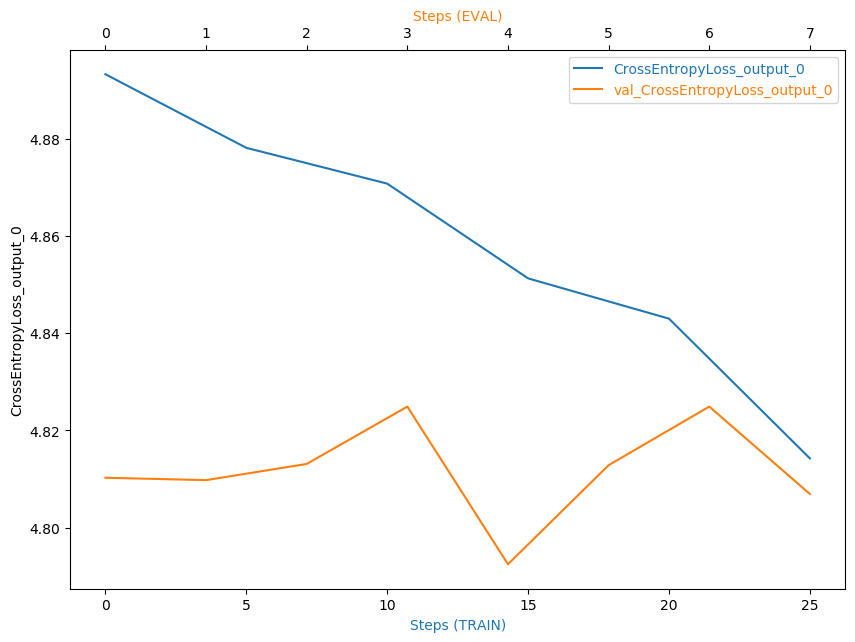

In [41]:
plot_tensor(trial, "CrossEntropyLoss_output_0")

## Model Deploying

In [50]:
predictor=estimator.deploy(initial_instance_count=1, instance_type="ml.t2.medium")

INFO:sagemaker:Creating model with name: pytorch-training-2023-04-14-15-39-40-724
INFO:sagemaker:Creating endpoint-config with name pytorch-training-2023-04-14-15-39-40-724
INFO:sagemaker:Creating endpoint with name pytorch-training-2023-04-14-15-39-40-724


-----------!

In [30]:
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 582.4 kB/s eta 0:00:0000:0100:01
  Using cached nvidia_cublas_cu11-11.10.3.66-py3-none-manylinux1_x86_64.whl (317.1 MB)
  Using cached nvidia_cuda_nvrtc_cu11-11.7.99-2-py3-none-manylinux1_x86_64.whl (21.0 MB)
  Using cached nvidia_cudnn_cu11-8.5.0.96-2-py3-none-manylinux1_x86_64.whl (557.1 MB)
  Using cached nvidia_cuda_runtime_cu11-11.7.99-py3-none-manylinux1_x86_64.whl (849 kB)


In [32]:
!pip install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 38.6 MB/s eta 0:00:0000:0100:01


Actual Label: 064.English_toy_spaniel
Predicted Label: 064.English_toy_spaniel


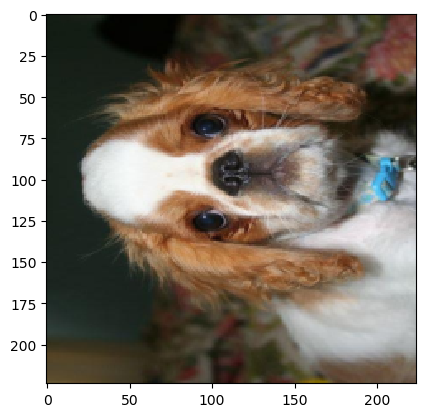

In [56]:
from train_model import  create_data_loaders
import numpy as np
import random
import os
from PIL import Image
import smdebug

data_dir = './dogImages/test'

label_list = sorted(os.listdir(data_dir))

test_loader = create_data_loaders(data_dir, batch_size=4)

images, labels = next(iter(test_loader))
print(f"Actual Label: {label_list[labels[0]]}")
response = predictor.predict(images)
labeled_predictions = list(zip(range(133), response[0]))
labeled_predictions.sort(key=lambda label_and_prob: 1.0 - label_and_prob[1])
print(f"Predicted Label: {label_list[labeled_predictions[0][0]]}")
plt.imshow(images[0].T)
plt.show()

In [49]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: pytorch-training-2023-04-14-15-33-10-555
INFO:sagemaker:Deleting endpoint with name: pytorch-training-2023-04-14-15-33-10-555
